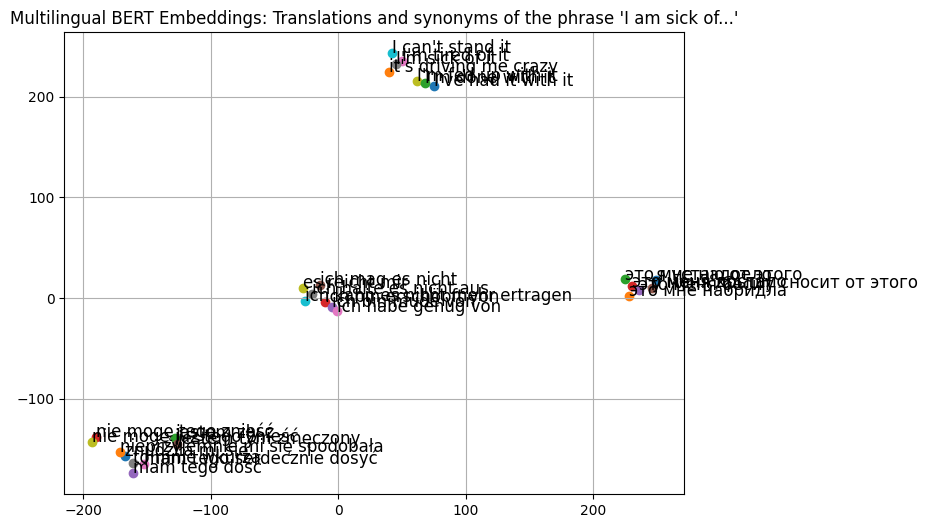

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# Use multilingual BERT
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
model.eval()

def get_embedding(word):
    inputs = tokenizer(word, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    hidden_states = outputs.last_hidden_state[0]
    return hidden_states[1:-1].mean(dim=0)  # average token embeddings

# to compare
words = ["я устаю от этого", "это мне набридла", "это мне надоело", "это меня достало", "это меня бесит", "у меня крышу сносит от этого",
         "I'm tired of it", "I'm sick of it", "I'm fed up with it", "I can't stand it", "I've had it with it", "it's driving me crazy", "I'm done with it",
         "ich bin erschöpft von", "ich bin müde von", "ich mag es nicht", "ich habe genug von", "ich halte es nicht aus", "es reicht mir", "ich kann es nicht mehr ertragen",
         "znudziła mi się", "nieprzyjemnie mi się spodobała","jestem zły z", "nie mogę tego znieść", "mam tego dość", "jestem tym zmęczony", "mam tego serdecznie dosyć", "to mnie wkurza", "nie mogę już tego znieść"
         ]

embeddings = [get_embedding(w) for w in words]
vectors = torch.stack(embeddings).numpy()

# t-SNE reduction
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
reduced = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y, label=f"{word}")
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Multilingual BERT Embeddings: Translations and synonyms of the phrase 'I am sick of...'")
plt.grid(True)
plt.show()


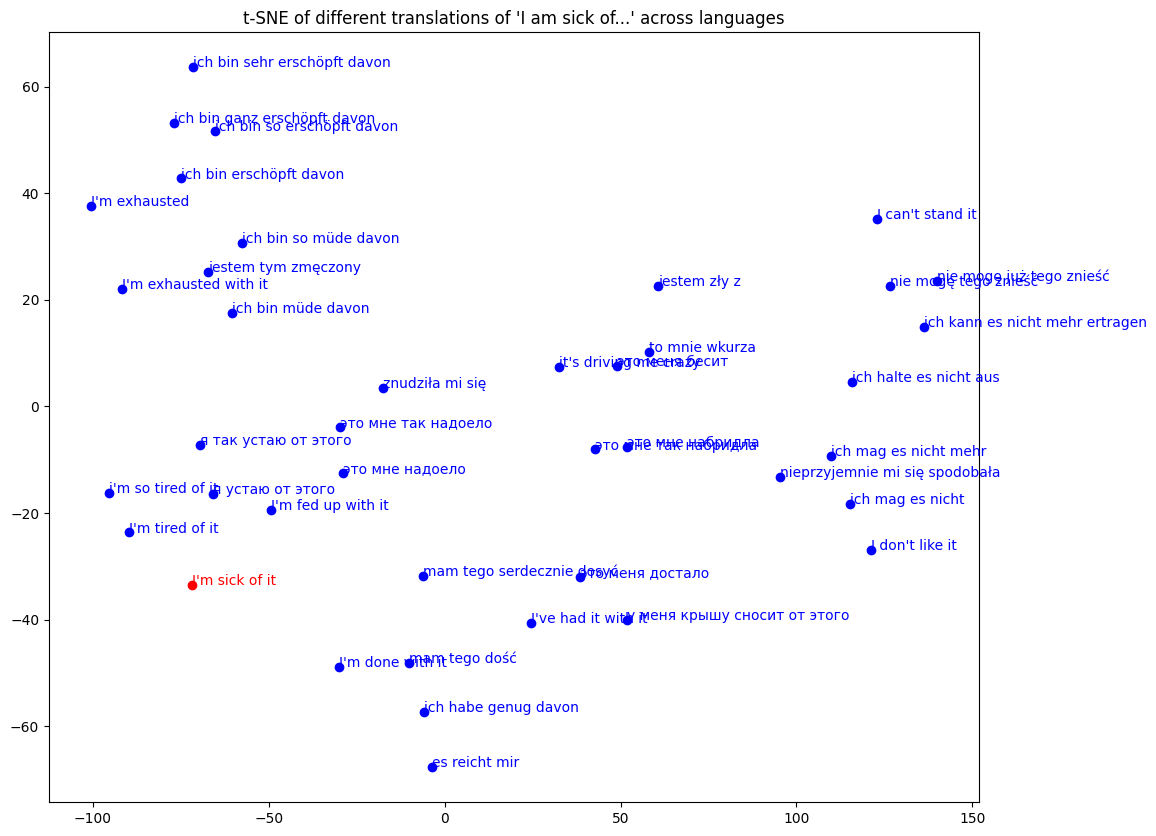

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

phrases = [

    "это мне набридла", "это мне так набридла",
    "это мне надоело", "это мне так надоело",
    "это меня достало",
    "это меня бесит",
    "у меня крышу сносит от этого",

    #tired
    "I'm tired of it", "I'm exhausted with it", "I'm exhausted", "i'm so tired of it",
    "ich bin erschöpft davon",  "ich bin ganz erschöpft davon",  "ich bin sehr erschöpft davon", "ich bin so erschöpft davon",
    "ich bin müde davon", "ich bin so müde davon",
    "я устаю от этого", "я так устаю от этого",


    "I'm sick of it", "I'm fed up with it", "I can't stand it",
    "I've had it with it", "it's driving me crazy", "I'm done with it",

    #like
    "I don't like it",
    "ich mag es nicht mehr", "ich mag es nicht",

    "ich habe genug davon", "ich halte es nicht aus", "es reicht mir",
    "ich kann es nicht mehr ertragen",

    #polish egs
    "znudziła mi się",
    "nieprzyjemnie mi się spodobała", "jestem zły z",
    "nie mogę tego znieść", "mam tego dość", "jestem tym zmęczony",
    "mam tego serdecznie dosyć", "to mnie wkurza", "nie mogę już tego znieść"
]

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(phrases)

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced = tsne.fit_transform(embeddings)

#plot
plt.figure(figsize=(12, 10))
for i, phrase in enumerate(phrases):
    color = 'red' if phrase == "I'm sick of it" else 'blue'
    plt.scatter(reduced[i, 0], reduced[i, 1], color=color)
    plt.annotate(phrase, (reduced[i, 0], reduced[i, 1]), color=color)
plt.title("t-SNE of different translations of 'I am sick of...' across languages")
plt.show()


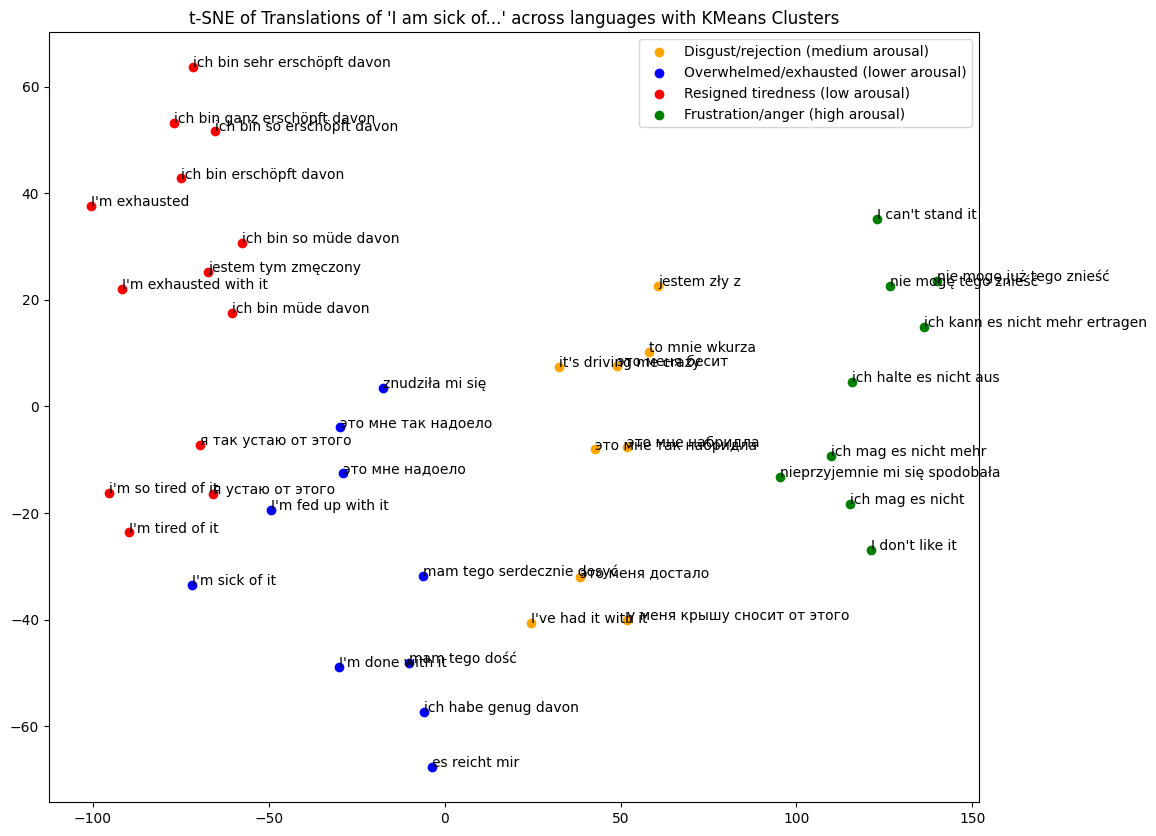

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(reduced)

cluster_labels = {
    0: 'Resigned tiredness (low arousal)',
    1: 'Frustration/anger (high arousal)',
    2: 'Overwhelmed/exhausted (lower arousal)',
    3: 'Disgust/rejection (medium arousal)'
}

colors = ['red', 'green', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(12, 10))

for i in range(len(reduced)):
    cluster_id = labels[i]
    ax.scatter(reduced[i, 0], reduced[i, 1], color=colors[cluster_id], label=cluster_labels[cluster_id] if i == list(labels).index(cluster_id) else "")
    ax.annotate(phrases[i], (reduced[i, 0], reduced[i, 1]))

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.title("t-SNE of Translations of 'I am sick of...' across languages with KMeans Clusters")
plt.show()